In [24]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from AbundanceMatching import *
import numpy as np
import Corrfunc
from Corrfunc.theory import wp
from scipy.stats import multivariate_normal
from galaxy_statistics import generate_wp,comp_deconv_steps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Abundance Matching (SDSS) - M_star < -21,-20, and -18

In [21]:
data_path = '/u/ki/rmredd/data/'
# Luminosity function
lf_20 = np.loadtxt(data_path + 'lf/tinker/lf_jt_20.dat')
lf_19 = np.loadtxt(data_path + 'lf/tinker/lf_jt_19.dat')
lf_18 = np.loadtxt(data_path + 'lf/tinker/lf_jt_18.dat')
lf_18 = lf_18[lf_18[:,1]>0,:]

wp_path = '/u/ki/rmredd/data/corr_wp/tinker_sdss_wp/'
wp_20 = np.loadtxt(wp_path + 'wp_20.dat')
wp_20_cov_temp = np.loadtxt(wp_path + 'wp_covar_20.dat')
wp_20_cov = np.zeros((len(wp_20),len(wp_20)))
for wp_tup in wp_20_cov_temp:
    wp_20_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_20_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
wp_18 = np.loadtxt(wp_path + 'wp_18.dat')
wp_18_cov_temp = np.loadtxt(wp_path + 'wp_covar_18.dat')
wp_18_cov = np.zeros((len(wp_18),len(wp_18)))
for wp_tup in wp_18_cov_temp:
    wp_18_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_18_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
wp_21 = np.loadtxt(wp_path + 'wp_21.dat')
wp_21_cov_temp = np.loadtxt(wp_path + 'wp_covar_21.dat')
wp_21_cov = np.zeros((len(wp_21),len(wp_21)))
for wp_tup in wp_21_cov_temp:
    wp_21_cov[int(wp_tup[0])-1,int(wp_tup[1])-1] = wp_tup[2]
    wp_21_cov[int(wp_tup[1])-1,int(wp_tup[0])-1] = wp_tup[2]
    
r_cutoff = 15

wp_20_cov=wp_20_cov[wp_20[:,0]<r_cutoff,:]
wp_20_cov=wp_20_cov[:,wp_20[:,0]<r_cutoff]
wp_20_var = np.diag(wp_20_cov)
wp_20 = wp_20[wp_20[:,0]<r_cutoff]

wp_18_cov=wp_18_cov[wp_18[:,0]<r_cutoff,:]
wp_18_cov=wp_18_cov[:,wp_18[:,0]<r_cutoff]
wp_18_var = np.diag(wp_18_cov)
wp_18 = wp_18[wp_18[:,0]<r_cutoff]

wp_21_cov=wp_21_cov[wp_21[:,0]<r_cutoff,:]
wp_21_cov=wp_21_cov[:,wp_21[:,0]<r_cutoff]
wp_21_var = np.diag(wp_21_cov)
wp_21 = wp_21[wp_21[:,0]<r_cutoff]

box_size = 125
pimax = 40.0
scatters = [0.1,0.2,0.3]
deconv_repeat = 200
mag_cuts=[-21.0,-20.0,-18.0]

# Halos from n body sim
halo_path = '/nfs/slac/g/ki/ki21/cosmo/yymao/sham_test/resolution-test/c125-1024/'
halos = np.load(halo_path + 'hlist_1.00000.npy')

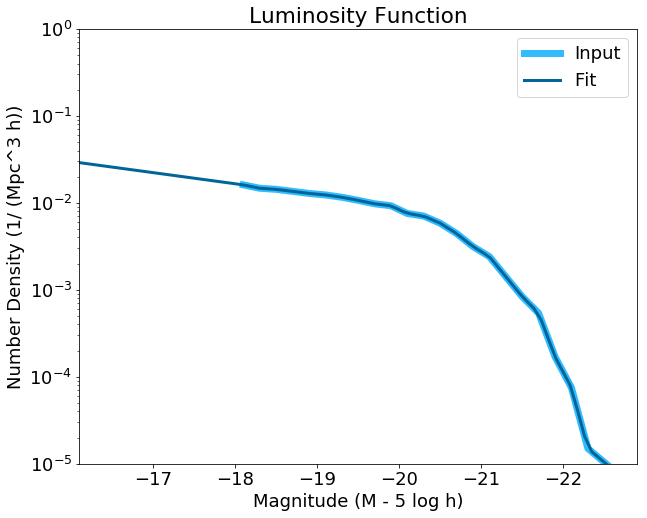

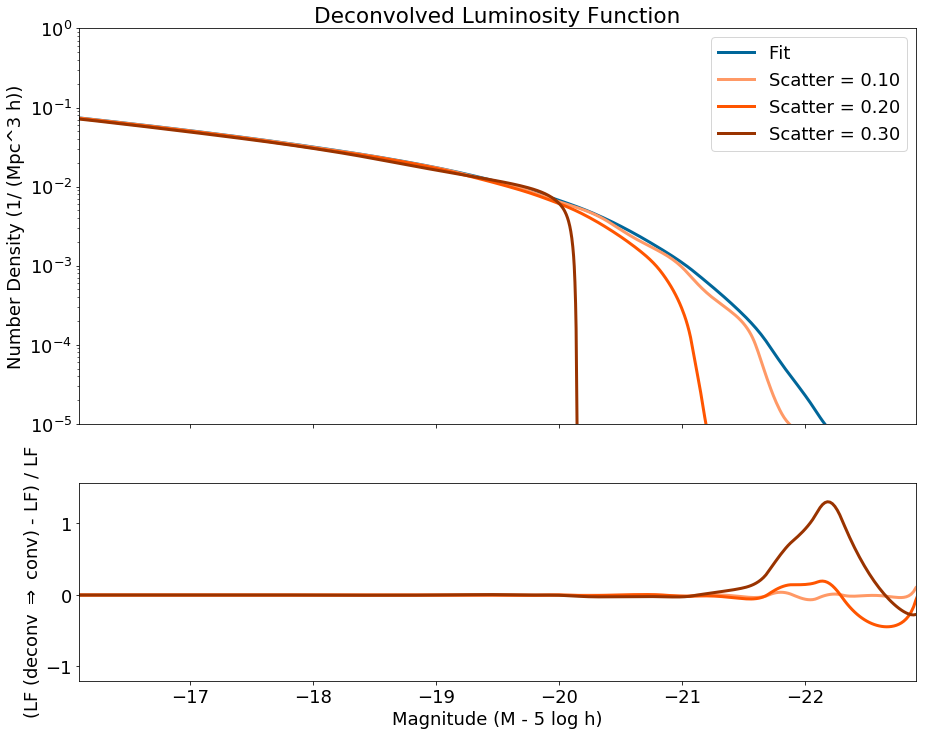

Scatter 0.10 catalog has 2125 galaxies
Scatter 0.20 catalog has 2125 galaxies
Scatter 0.30 catalog has 2125 galaxies
Scatter 0.10 catalog has 13079 galaxies
Scatter 0.20 catalog has 13079 galaxies
Scatter 0.30 catalog has 13079 galaxies
Scatter 0.10 catalog has 61955 galaxies
Scatter 0.20 catalog has 61955 galaxies
Scatter 0.30 catalog has 61955 galaxies


In [22]:
wp_binneds = generate_wp(lf_18,halos,'vpeak',wp_20[:,0],box_size,mag_cuts=mag_cuts,pimax=pimax,scatters=scatters,
                    deconv_repeat=deconv_repeat,verbose=True)

chi^2 is -134.515533


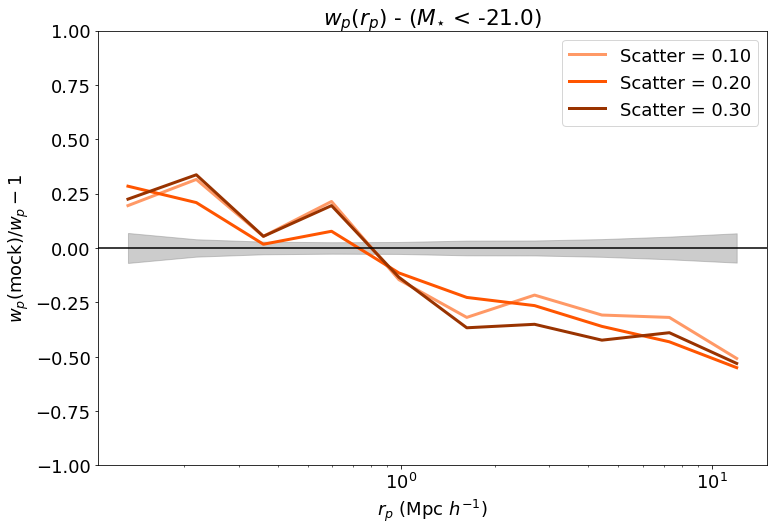

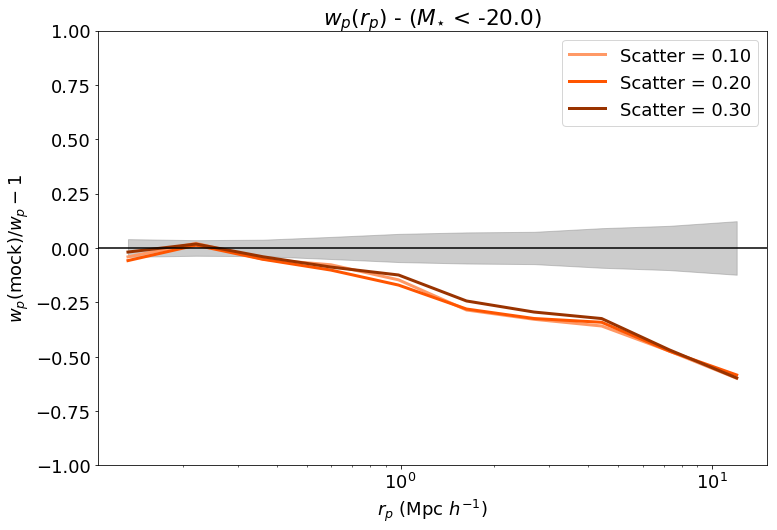

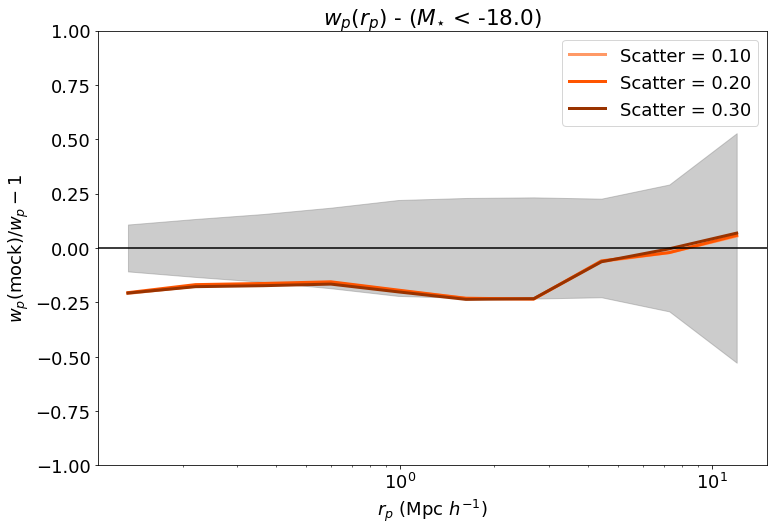

In [18]:
custom_blues_complement = ["#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300","#662200"]

# M_star < -21
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[0]:
    plt.plot(wp_21[:,0],wp_binned/wp_21[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_21[:,0],-np.sqrt(wp_21_var)/wp_21[:,1],np.sqrt(wp_21_var)/wp_21[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[0]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

# M_star < -20
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[1]:
    plt.plot(wp_20[:,0],wp_binned/wp_20[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_20[:,0],-np.sqrt(wp_20_var)/wp_20[:,1],np.sqrt(wp_20_var)/wp_20[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[1]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

# M_star < -18
plt.figure(figsize=(12,8))
legend = []
for wp_binned in wp_binneds[2]:
    plt.plot(wp_18[:,0],wp_binned/wp_18[:,1]-1,lw=3,c=custom_blues_complement[2*len(legend)])
    legend.append('Scatter = %.2f'%(scatters[len(legend)]))
plt.fill_between(wp_18[:,0],-np.sqrt(wp_18_var)/wp_18[:,1],np.sqrt(wp_18_var)/wp_18[:,1],alpha=0.4,color='grey')
plt.title('$w_p(r_p)$ - ($M_{\star}$ < %.1f)'%(mag_cuts[2]))
plt.legend(legend)
plt.ylabel('$w_p (\mathrm{mock}) / w_p - 1$')
plt.xlabel('$r_p \ (\mathrm{Mpc } \ h^{-1})$')
plt.ylim([-1,1])
plt.xscale('log')
plt.axhline(0,c='k')

print('chi^2 is %f'%(multivariate_normal.logpdf(wp_binned,wp_20[:,1],wp_20_cov)))

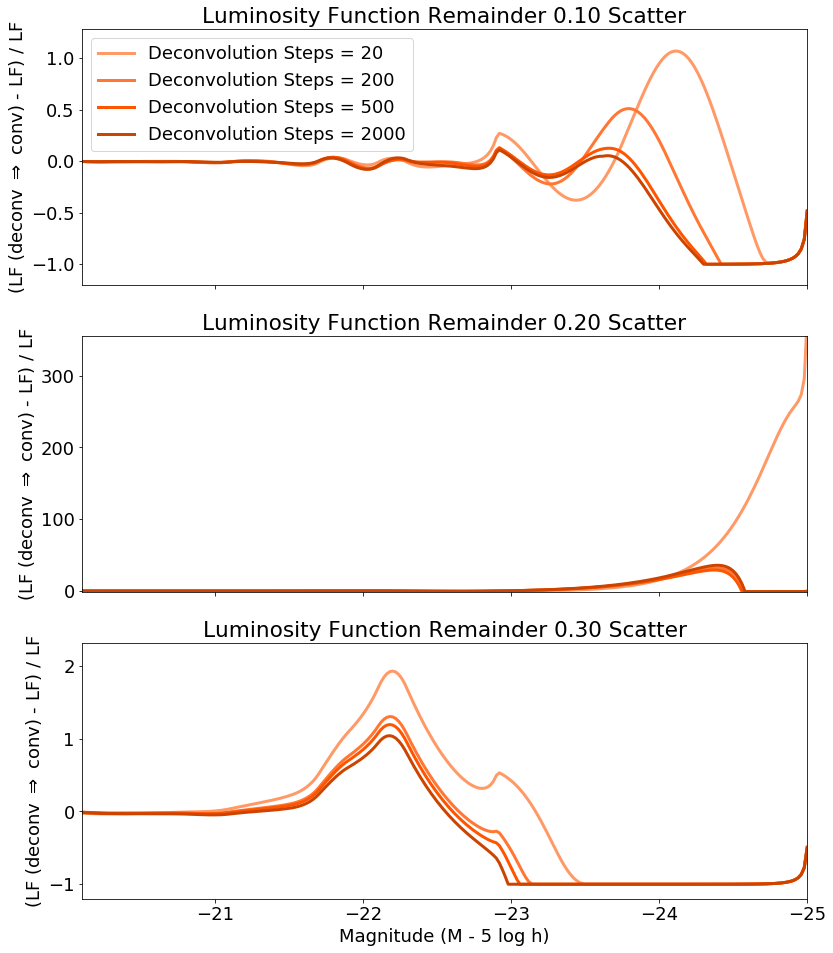

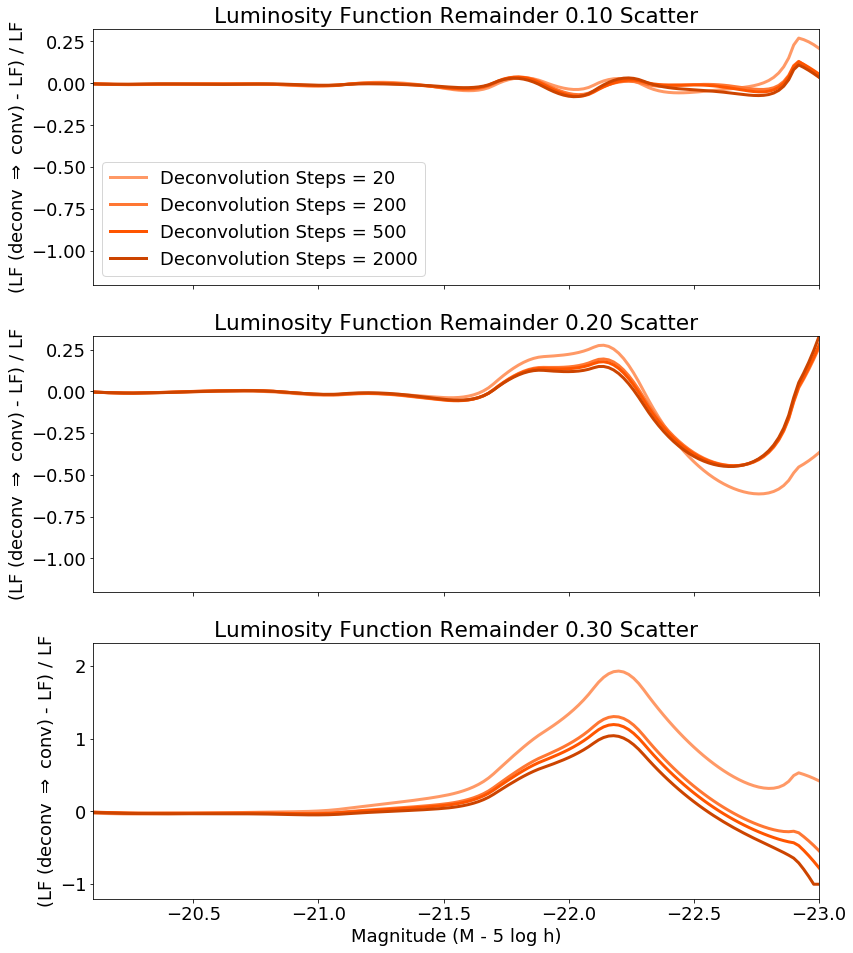

In [39]:
deconv_repeats = [20,200,500,2000]
comp_deconv_steps(lf_18,scatters,deconv_repeats,m_max=-25)
comp_deconv_steps(lf_18,scatters,deconv_repeats,m_max=-23)